In [23]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from utilsforecast.plotting import plot_series
from mlforecast import MLForecast
from mlforecast.target_transforms import Differences
from sklearn.linear_model import LinearRegression

# data

In [24]:
df = pd.read_csv(
    "https://datasets-nixtla.s3.amazonaws.com/air-passengers.csv", 
    parse_dates=["ds"]
)

# data check
print(df.head())
print(df.shape)
print(df["unique_id"].value_counts())

       unique_id         ds    y
0  AirPassengers 1949-01-01  112
1  AirPassengers 1949-02-01  118
2  AirPassengers 1949-03-01  132
3  AirPassengers 1949-04-01  129
4  AirPassengers 1949-05-01  121
(144, 3)
AirPassengers    144
Name: unique_id, dtype: int64


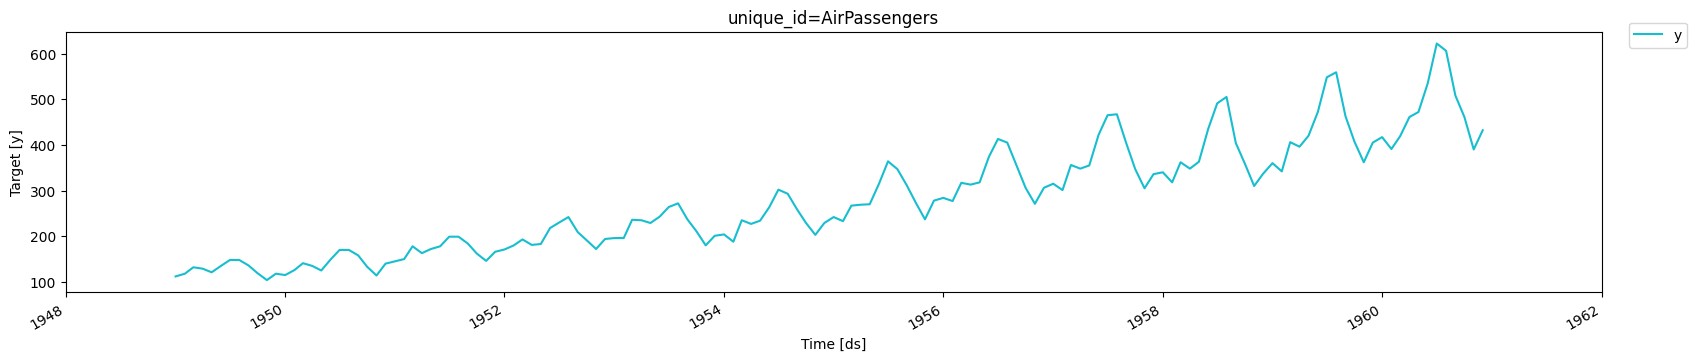

In [25]:
# data visual
fig = plot_series(df)
fig

In [26]:
# model
fcst = MLForecast(
    models = LinearRegression(),
    freq = "MS",  # series has a monthly frequency
    lags = [12],
    target_transforms = [Differences([1])],  # remove trend
)

In [27]:
# model train
fcst.fit(df)

MLForecast(models=[LinearRegression], freq=MS, lag_features=['lag12'], date_features=[], num_threads=1)

In [28]:
# model predict
preds = fcst.predict(h = 12)
print(preds)

        unique_id         ds  LinearRegression
0   AirPassengers 1961-01-01        444.656555
1   AirPassengers 1961-02-01        417.470734
2   AirPassengers 1961-03-01        446.903046
3   AirPassengers 1961-04-01        491.014130
4   AirPassengers 1961-05-01        502.622223
5   AirPassengers 1961-06-01        568.751465
6   AirPassengers 1961-07-01        660.044312
7   AirPassengers 1961-08-01        643.343323
8   AirPassengers 1961-09-01        540.666687
9   AirPassengers 1961-10-01        491.462708
10  AirPassengers 1961-11-01        417.095154
11  AirPassengers 1961-12-01        461.206238


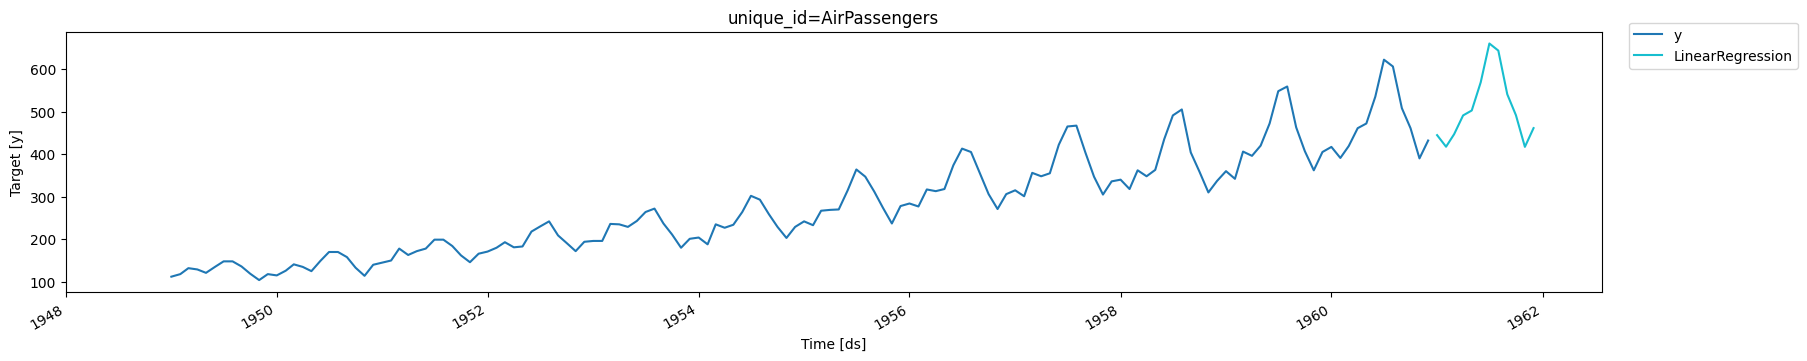

In [29]:
# result visual
fig = plot_series(df, preds)
fig